# Classification Model Predicting White Wine Quality

## Introduction

<b>Vinho Verde</b> is renowned for its savoury taste, fresh colour and stress-relieving benefits. Among the variants of Vinho Verde, white Vinho Verde stood out as the most promising individual in the global market. A study suggests that the global dry white wine industry surged in 2022 and is expected to maintain an upward trend until 2030 (Market Reports World, 2023). This urging demand in the dry white wine market made quality classification daily more significant; therefore, we have designed a k-nearest-neighbor classification model that determines the quality of the Vinho Verde regarding the wine’s chemical ingredients with reasonable accuracy.

In our project, we will try to answer the question: <u>“How can we predict the level of quality of the White Vinho Verde given the physicochemical attributes in our dataset?”</u>

We utilized the <b>Wine Quality</b> dataset from the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/), which features 11 physicochemical attributes of wines, such as fixed acidity, citric acid, residual sugar, density, a quality variable, etc.

Most of the variables, besides the “wine quality” variable, are quantitative. Our dataset focuses on the white variant of Vinho Verde, in which most of the variables are measured in grams/dm^3, with the exceptions of free_sulfur_dioxide (milligrams/dm^3), total_sulfur_dioxide (milligrams/dm^3), and pH (represented on a scale from 0 to 14) (Cortez, Cerdeira, Almeida, Matos, & Reis, 2009). Additionally, the dataset contains 4898 observations without any non-applicable values. Our project involves cleaning and preprocessing the Vinho Verde dataset, implementing appropriate algorithms, k-tuning, and k-nearest-neighbor classification models for wine quality predictions on a scale from 1 to 10 with increasing quality evaluation.

In summary, this document provides a thorough list of procedures for our development of an accurate white Vinho Verde wine quality classification model.  


## Methods & Results

In [92]:
# Run This Cell Before Continuing
set.seed(999)
library(repr)
library(tidyverse)
library(tidymodels)
library(themis)
library(janitor)
library(cowplot)

In [93]:
install.packages("themis")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



Downloading the data to use during our Analysis.

In [94]:
url <- "https://raw.githubusercontent.com/TrBili/dsci-100-project/main/data_2/winequality-white.csv"
download.file(url, "data/winequality-white.csv")

Extracting the data from the downloaded file

In [95]:
wine_data_raw <- read_csv2("data/winequality-white.csv")

head(wine_data_raw)

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Rows: 4898 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (6): volatile acidity, citric acid, residual sugar, chlorides, density, ...
dbl (1): quality
num (5): fixed acidity, free sulfur dioxide, total sulfur dioxide, pH, alcohol

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,88,6
63,0.3,0.34,1.6,0.049,14,132,0.994,33,0.49,95,6
81,0.28,0.4,6.9,0.05,30,97,0.9951,326,0.44,101,6
72,0.23,0.32,8.5,0.058,47,186,0.9956,319,0.4,99,6
72,0.23,0.32,8.5,0.058,47,186,0.9956,319,0.4,99,6
81,0.28,0.4,6.9,0.05,30,97,0.9951,326,0.44,101,6


We can see that some numerical variables have a `chr` data type; hence, we need to make it numeric to use later in our model. We can also see that the names of variables have spaces; hence, we need to make them suitable for use. Finally, we have to make the `quality` column, a factor as we will use it as our Class (categorical variable) during this analysis. 

We will now clean our data to make it suitable for Exploratory Data Analysis.

In [96]:
wine_data <- wine_data_raw |> 
                clean_names() |>                        
                drop_na() |> # removes rows with NA 
                map_df(as.numeric) |> # as all our columns are numeric
                mutate(quality = as_factor(quality)) # we will use quality as our class
                

head(wine_data)

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,p_h,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
7,0.27,0.36,20.7,0.045,45,170,1.0010,3,0.45,88,6
63,0.30,0.34,1.6,0.049,14,132,0.9940,33,0.49,95,6
81,0.28,0.40,6.9,0.050,30,97,0.9951,326,0.44,101,6
72,0.23,0.32,8.5,0.058,47,186,0.9956,319,0.40,99,6
72,0.23,0.32,8.5,0.058,47,186,0.9956,319,0.40,99,6
81,0.28,0.40,6.9,0.050,30,97,0.9951,326,0.44,101,6


All the unique values in the quality column

In [97]:
wine_data |> distinct(quality)

quality
<fct>
6
5
7
8
4
3
9


Using the clean data, we will spit our data into training & testing set, then perform exploratory data analysis. 

In [98]:
wine_split <- initial_split(wine_data, prop=0.75,strata=quality)

## Training Data
wine_train <- training(wine_split)

## Testing Data
wine_test <- testing(wine_split)

head(wine_train)
head(wine_test)

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,p_h,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
81,0.27,0.41,1.45,0.033,11,63,0.9908,299,0.56,12,5
86,0.23,0.40,4.20,0.035,17,109,0.9947,314,0.53,97,5
79,0.18,0.37,1.20,0.040,16,75,0.9920,318,0.63,108,5
65,0.31,0.14,7.50,0.044,34,133,0.9955,322,0.50,95,5
62,0.66,0.48,1.20,0.029,29,75,0.9892,333,0.39,128,8
76,0.67,0.14,1.50,0.074,25,168,0.9937,305,0.51,93,5


fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,p_h,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
81,0.28,0.40,6.90,0.050,30,97,0.9951,326,0.44,101,6
81,0.22,0.43,1.50,0.044,28,129,0.9938,322,0.45,11,6
83,0.42,0.62,19.25,0.040,41,172,1.0002,298,0.67,97,5
63,0.48,0.04,1.10,0.046,30,99,0.9928,324,0.36,96,6
68,0.26,0.42,1.70,0.049,41,122,0.9930,347,0.48,105,8
58,0.27,0.20,14.95,0.044,22,179,0.9962,337,0.37,102,5


We will now be doing Exploratory Data Analysis on our training set.

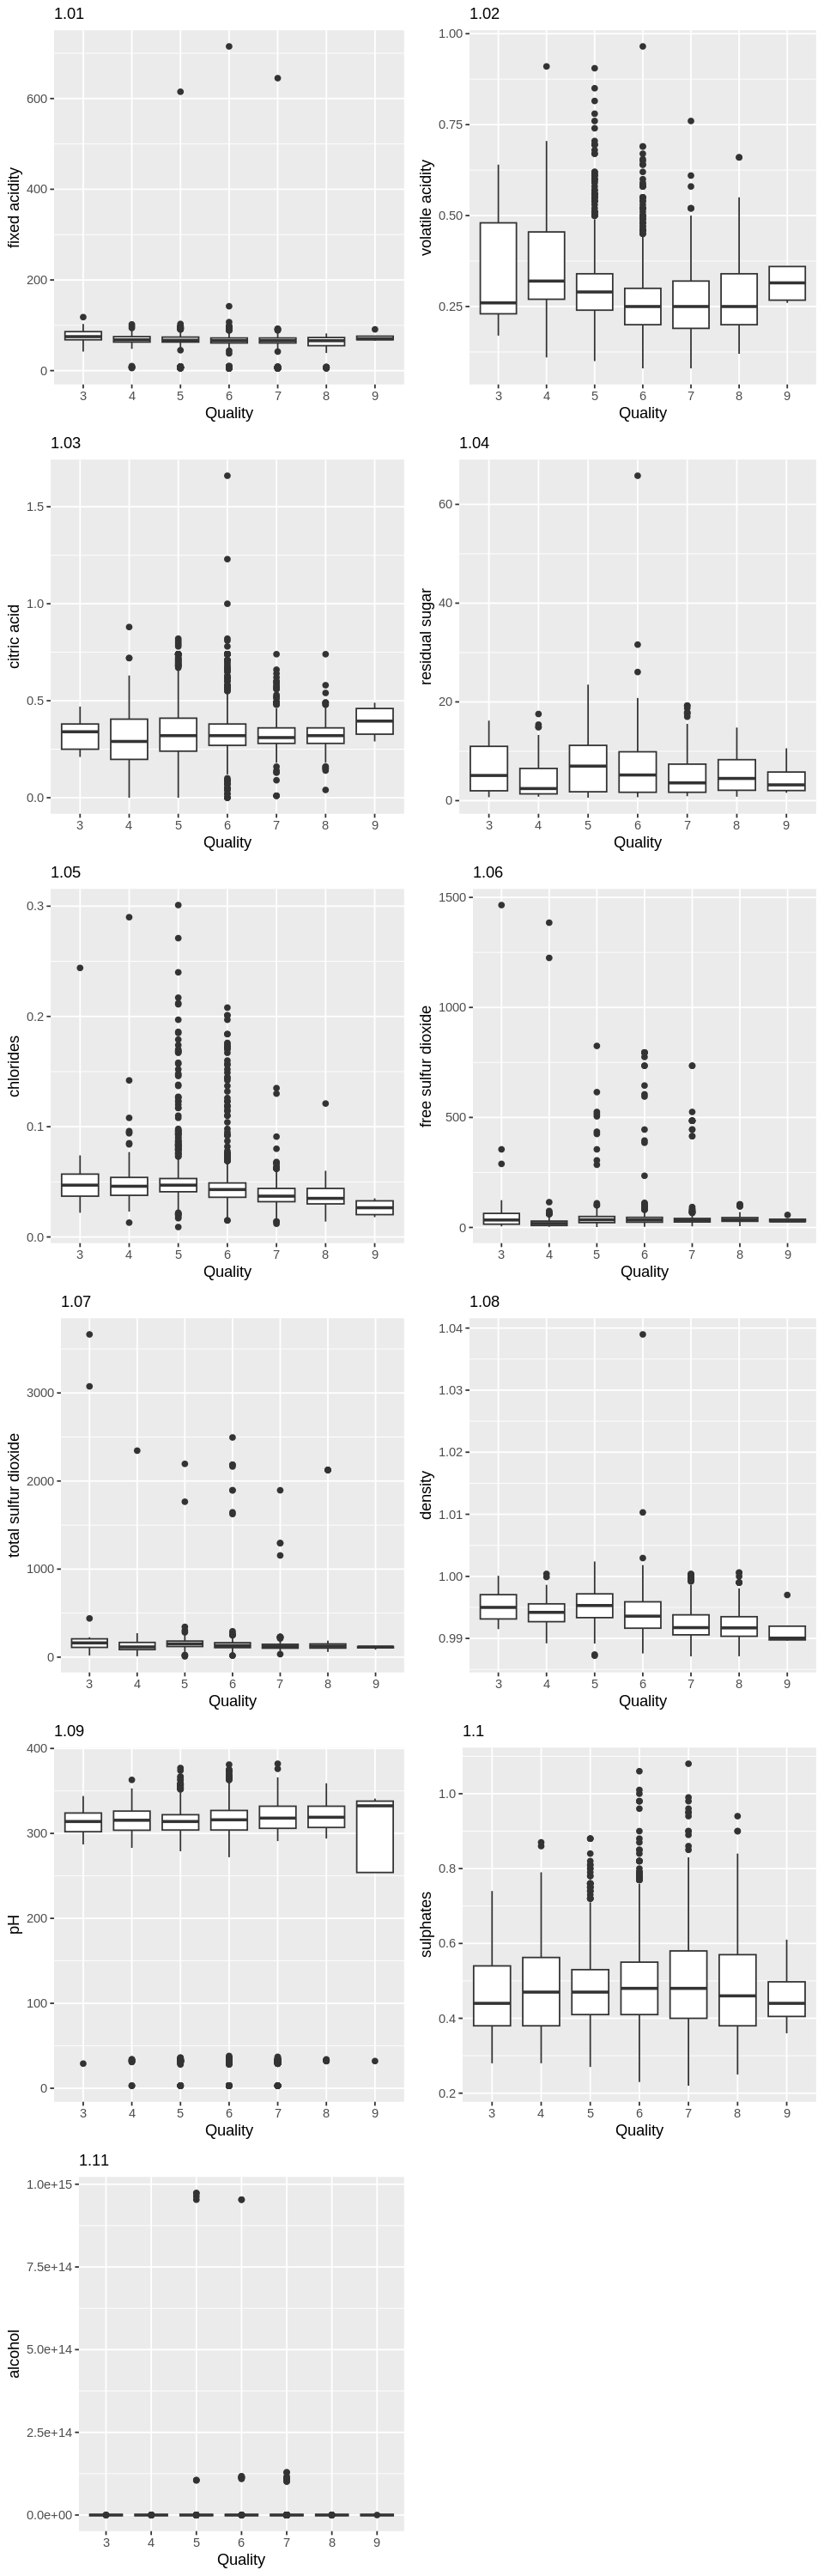

In [99]:
## Setting the Width & Height of the Plot
options(repr.plot.width=8,repr.plot.height=25)

## Extracting all the column names from our clean Dataset
all_cols <- wine_train |> select(-quality) |> colnames()

## Extracting all the column names from our raw Dataset
col_names <- wine_data_raw |> colnames()

## Creating a list to store all our plots
plots <- list()

## Loop Variable
i <- 0

## Looping through each column
for(c in all_cols) {
    i <- i + 1
    c_sym <- sym(c)
    box_plot <- ggplot(wine_train, aes(x=quality,y=!!c_sym)) +
            geom_boxplot() +
            labs(x="Quality", y=col_names[i], subtitle=(100 + i)/100)
    plots[[c]] <- box_plot
}

## Merging all the plots
plot_grid(plotlist = plots, ncol = 2)

Observing the box plots above, the median/length appears to be different between the boxes, which implies that the variable has a high effect on the response variable.

Observing the boxplot above, we can choose the following attributes.
1. Volatile Acidity
2. Citric Acid
3. Residual Sugar
4. Sulphates

We will now perform a summary analysis on our selected predictors from our training data, to further distinguish between relevant predictors.

In [100]:
## selecting the required variables
selected_wine_train_data <- wine_train |> 
                    select(quality, volatile_acidity, citric_acid, residual_sugar, sulphates)


## Summary of Training Data - Mean of Each Column & Count of Each Quality
summary_wine_train_data <- wine_train |>
                    group_by(quality) |>
                    summarize(mean_volatile_acidity = mean(volatile_acidity),
                             mean_citric_acid = mean(citric_acid),
                             mean_residual_sugar = mean(residual_sugar),
                             mean_sulphates = mean(sulphates),
                             total_count=n(),
                             percentage=(100*n()/nrow(wine_train)))

summary_wine_train_data
print("Summary Table 1")

quality,mean_volatile_acidity,mean_citric_acid,mean_residual_sugar,mean_sulphates,total_count,percentage
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
3,0.3438235,0.3294118,7.155882,0.4770588,17,0.4629630
4,0.3681897,0.3068966,4.508190,0.4825862,116,3.1590414
5,0.3036410,0.3360422,7.296006,0.4814968,1089,29.6568627
6,0.2613774,0.3348422,6.418871,0.4917597,1648,44.8801743
7,0.2616767,0.3257895,5.266165,0.5015489,665,18.1100218
8,0.2828195,0.3277444,5.789098,0.4824812,133,3.6220044
9,0.3125000,0.3925000,4.650000,0.4625000,4,0.1089325


[1] "Summary Table 1"


The summary table above shows that our selected predictors have variations with `quality`. 

Total Count: The `total_count` column indicates the number of observations for each quality level. A significant imbalance is evident, with much more data for quality levels 5 and 6 compared to others. This could potentially bias a KNN model, and we might need to consider methods to address this class imbalance, such as upsampling.

Percentage: This column shows the percentage of observations in each quality level relative to the entire dataset. Quality 5 and 6 make up a large percentage of the data, indicating that the dataset is imbalanced, which could influence the KNN classifier's performance.

<hr></hr>

We will start by creating a recipe which scales all our variables, and also rebalances our dataset by oversampling all the qualities and maintains a 1:1 ratio.

In [101]:
wine_recipe <- recipe(quality ~ quality + volatile_acidity + citric_acid + residual_sugar + sulphates, data = wine_train) |>
                step_upsample(quality, over_ratio = 1, skip=TRUE) |>
                step_scale(all_predictors()) |>
                step_center(all_predictors())

wine_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 4



── Operations 

• Up-sampling based on: quality

• Scaling for: all_predictors()

• Centering for: all_predictors()



We will now use 5-fold cross-validation and tune our model, to find the best K for our K-nearest classification algortihm.

In [102]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

k_vals <- tibble(neighbors = seq(from=1,to=10,by=1))

wine_train_vfold <- vfold_cv(wine_train, v=5,strata=quality)

vfold_metrics <- workflow() |>
                    add_recipe(wine_recipe) |>
                    add_model(knn_spec) |>
                    tune_grid(resamples=wine_train_vfold, grid=k_vals) |>
                    collect_metrics()

accuracies <- vfold_metrics |> filter(.metric=="accuracy")

accuracies

→ A | warning: No observations were detected in `truth` for level(s): '9'
               Computation will proceed by ignoring those levels.

There were issues with some computations   A: x1

There were issues with some computations   A: x2

There were issues with some computations   A: x2





neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.5345953,5,0.005699947,Preprocessor1_Model01
2,accuracy,multiclass,0.5351402,5,0.005761713,Preprocessor1_Model02
3,accuracy,multiclass,0.4567061,5,0.006623831,Preprocessor1_Model03
4,accuracy,multiclass,0.4501666,5,0.006033358,Preprocessor1_Model04
5,accuracy,multiclass,0.4016934,5,0.006631934,Preprocessor1_Model05
6,accuracy,multiclass,0.3902566,5,0.006626800,Preprocessor1_Model06
7,accuracy,multiclass,0.3796344,5,0.007560054,Preprocessor1_Model07
8,accuracy,multiclass,0.3766356,5,0.007826605,Preprocessor1_Model08
9,accuracy,multiclass,0.3657409,5,0.006791814,Preprocessor1_Model09


We now plot a graph to choose the Best K.

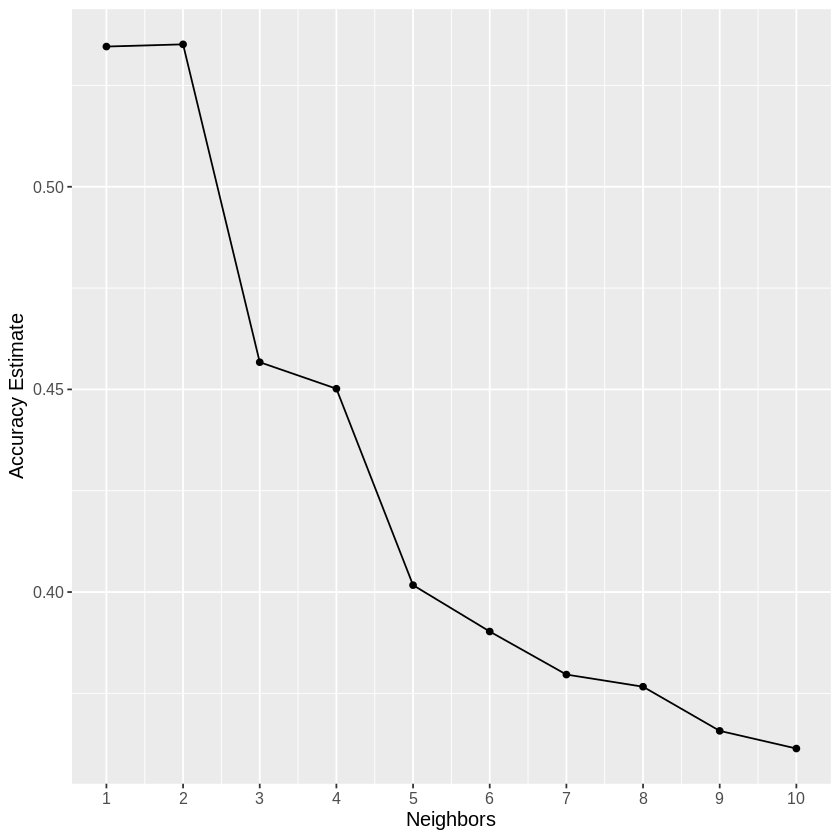

In [103]:
options(repr.plot.width=7,repr.plot.height=7)

accuracy_vs_k <- ggplot(accuracies, aes(x=neighbors, y=mean)) +
                    geom_point() +
                    geom_line() +
                    labs(x="Neighbors", y="Accuracy Estimate") +
                    scale_x_continuous(limits=c(1,10), breaks=1:10) +
                    theme(text=element_text(size=12))
accuracy_vs_k

Using the above graph, we can select a K value for our model. And perform the classification.

In [104]:
wine_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 2) |>
            set_engine("kknn") |>
            set_mode("classification")

wine_fit <- workflow() |>
            add_recipe(wine_recipe) |>
            add_model(wine_spec) |>
            fit(data=wine_test)



wine_test_predictions <- predict(wine_fit, wine_test) |>
                            bind_cols(wine_test)

head(wine_test_predictions)

.pred_class,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,p_h,sulphates,alcohol,quality
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
6,81,0.28,0.40,6.90,0.050,30,97,0.9951,326,0.44,101,6
6,81,0.22,0.43,1.50,0.044,28,129,0.9938,322,0.45,11,6
5,83,0.42,0.62,19.25,0.040,41,172,1.0002,298,0.67,97,5
6,63,0.48,0.04,1.10,0.046,30,99,0.9928,324,0.36,96,6
8,68,0.26,0.42,1.70,0.049,41,122,0.9930,347,0.48,105,8
5,58,0.27,0.20,14.95,0.044,22,179,0.9962,337,0.37,102,5


Now we will check the accuracy of the prediction results using metrics and see the table of predicted and correct labels using Confusion Matrix

In [105]:
wine_test_predictions |> metrics(truth=quality, estimate=.pred_class) |> filter(.metric == "accuracy")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.9502447


In [106]:
wine_confusion <- wine_test_predictions |> conf_mat(truth=quality, estimate=.pred_class)
wine_confusion

          Truth
Prediction   3   4   5   6   7   8   9
         3   3   0   1   0   0   0   0
         4   0  47   3   0   0   0   0
         5   0   0 316   0   2   0   0
         6   0   0  36 550   6   0   0
         7   0   0  10   0 206   0   0
         8   0   0   2   0   1  42   0
         9   0   0   0   0   0   0   1